# 1. Load dataloaders

In [1]:
from data.dataloader import create_tremor_dataloaders

train_loader, val_loader = create_tremor_dataloaders(
    "../project_datasets/tremor/",
    batch_size= 32,
    include_other= False,
    print_details=False,
)

# 2. Create models

In [2]:
from Models.CNN_models.model_V9 import TremorNetV9

model = TremorNetV9(all_movements=True)

# 3. Train models

In [ ]:
from training.trainer import train

train(
    model=model,
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    
    model_name="Movemnet_aware_Model",
    run_name="Movemnet_aware_Model",
    
    epochs = 50,
    per_movement =False,
    
    max_lr= 3e-4,
    debug_mode= False)

In [13]:
!tensorboard --logdir=runs

^C


In [3]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# load model
checkpoint = torch.load("checkpoints/Movemnet_aware_Model_BEST.pth", map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

print(f"Loaded pretrained model:")
print(f"- val_loss={checkpoint['val_loss']:.4f}")
print(f"- balanced_accuracy={checkpoint['balanced_accuracy']:.4f}")
print(f"- macro_f1={checkpoint['macro_f1']:.4f}")

Loaded pretrained model:
- val_loss=0.5664
- balanced_accuracy=0.8575
- macro_f1=0.7953


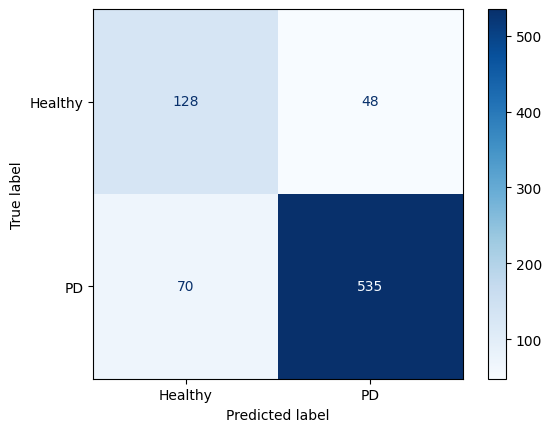

In [12]:
from training.confusion_mat import plot_confusion_matrix

plot_confusion_matrix(
    model=model,
    dataloader=val_loader,
    device="cuda",
    class_names=["Healthy", "PD"],
    threshold=0.25,
)